Задание
Основные цели этого задания:

- Научиться строить архитектуру модели

- Научиться распознавать факты переобучения и недообучения модели

- Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров

- Научиться применять методы регуляризации для контроля переобучения

Задача:

Построить модель нейронной сети, предсказывающую поломку программного обеспечения по его анонимным признакам. В данной задаче необходимо оптимизировать метрику ROC_AUC.
План решения:

1. Загрузите данные. Проведите EDA по вашему датасету, опишите основные идеи для последующей генерации новых признаков.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.utils import class_weight

In [118]:
df = pd.read_csv('train_3.2.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
loc,22.0,14.0,11.0,8.0,11.0,23.0,24.0,14.0,34.0,9.0
v(g),3.0,2.0,2.0,1.0,2.0,4.0,4.0,1.0,10.0,2.0
ev(g),1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
iv(g),2.0,2.0,2.0,1.0,2.0,3.0,4.0,1.0,4.0,2.0
n,60.0,32.0,45.0,23.0,17.0,69.0,60.0,49.0,122.0,16.0
v,278.63,151.27,197.65,94.01,60.94,338.21,294.41,221.65,684.98,55.35
l,0.06,0.14,0.11,0.19,0.18,0.07,0.08,0.18,0.07,0.11
d,19.56,7.0,8.05,5.25,5.63,14.15,12.46,5.47,14.33,9.0
i,14.25,21.11,22.76,17.86,12.44,22.81,24.62,46.06,43.43,6.15


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

все данные числовые кроме целевой переменной,пропусков нет

2. Проведите разбиение на тренировочные и валидационные данные. Проведите необходимую предобработку данных для последующего обучения нейронной сети.

In [120]:
X = df.drop(['defects','id'],axis=1)
y = df.defects * 1 # проеобразуем булевые значения в числа


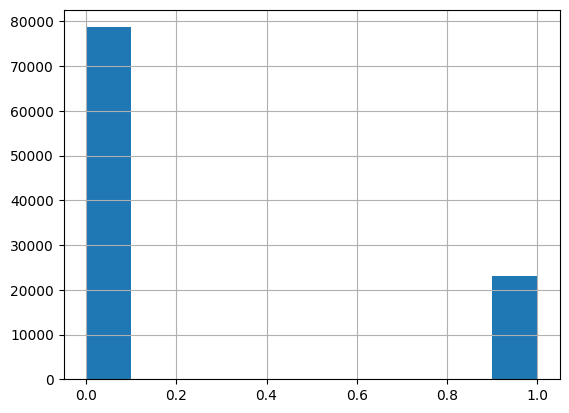

In [121]:
y.hist();

распределение классов целевой переменной не сбалансированно

In [122]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Предобработка данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)




3. Реализуйте функцию, в которой вы будете определять архитектуру модели. Функция должна возвращать скомпилированную модель.


In [124]:
def create_model(X_train):
    model = Sequential()
    model.add(Dense(128, activation='tanh', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['auc']
                  )
    
    return model

4. Обучите модель нейронной сети (без использования методов регуляризации) на исходной тренировочной выборке (без добавления новых признаков). В процессе обучения нужно отслеживать метрику ROC_AUC на каждой эпохе, на валидационных данных.

In [125]:
# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.64740592, 2.19599698])

In [126]:
model = create_model(X_train)

history = model.fit(X_train, y_train.to_numpy(),
           validation_data=(X_val, y_val.to_numpy()),
           epochs=25,
           batch_size=64,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/25


c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc: 0.7804 - loss: 0.5646 - val_auc: 0.7844 - val_loss: 0.5767
Epoch 2/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.7886 - loss: 0.5553 - val_auc: 0.7865 - val_loss: 0.5734
Epoch 3/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.7888 - loss: 0.5551 - val_auc: 0.7877 - val_loss: 0.5271
Epoch 4/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc: 0.7895 - loss: 0.5555 - val_auc: 0.7869 - val_loss: 0.5496
Epoch 5/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.7910 - loss: 0.5499 - val_auc: 0.7867 - val_loss: 0.5412
Epoch 6/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - auc: 0.7925 - loss: 0.5484 - val_auc: 0.7870 - val_loss: 0.5701
Epoch 7/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.7889 - loss: 0.5554 - val_auc: 0.7871 - val_loss: 0.5467
Epoch 8/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.7898 - loss: 0.5523 - val_auc: 0.7873 - val_loss: 0.5660
Epoch 9/25
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/st

In [127]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

C:\Users\gavri\AppData\Local\Temp\ipykernel_14876\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


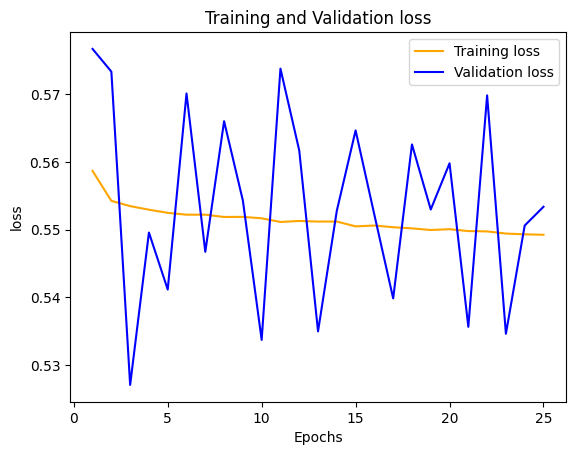

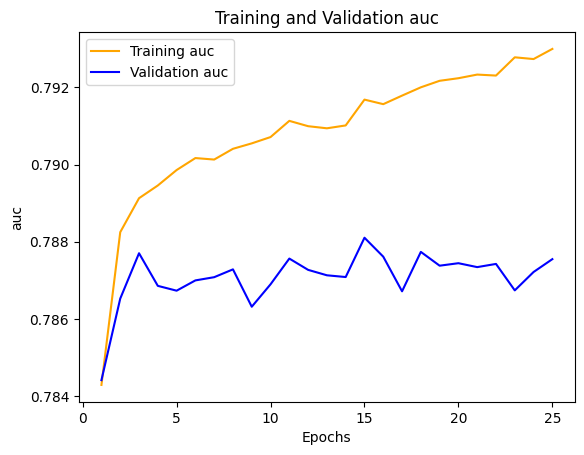

In [128]:
check_metrics(history, 'loss')
check_metrics(history, 'auc')

In [129]:
model.predict(X_val)

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step


array([[0.31220105],
       [0.5048516 ],
       [0.59746665],
       ...,
       [0.80209094],
       [0.34399188],
       [0.8852647 ]], dtype=float32)

In [130]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


In [131]:
print(model.evaluate(X_train,y_train.to_numpy(),verbose=0)[1])
print(model.evaluate(X_val,y_val.to_numpy(),verbose=0)[1])

0.7950567603111267
0.7875472903251648


5. Сгенерируйте новые признаки исходя из вашего EDA или наоборот — удалите ненужные признаки, которые препятствуют лучшему качеству модели при обучении. 

In [132]:
X_transformed = X.copy()

In [133]:
# Генерация новых признаков
X_transformed['loc_v'] = X_transformed['loc'] * X_transformed['v(g)']
X_transformed['total_Op_and_Opnd'] = X_transformed['total_Op'] + X_transformed['total_Opnd']

In [134]:
# Удаление ненужных признаков
X_transformed = X_transformed.drop(columns=['total_Op', 'total_Opnd', 'locCodeAndComment'], axis=1)

In [135]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  uniq_Op            101763 non-null  float64
 16  un

In [136]:
X_transformed_train, X_transformed_val, y_transformed_train, y_transformed_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [137]:
scaler = StandardScaler()
X_transformed_train = scaler.fit_transform(X_transformed_train)
X_transformed_val = scaler.transform(X_transformed_val)

6. Переобучите модель на данных, которые представляют из себя новый датафрейм, и оцените, как изменилось качество модели (то есть вы либо добавили новые признаки, либо удалили старые, либо всё вместе). Исходя из этого примите решение, какие новые признаки хорошо повлияли на качество, а какие нет.



In [138]:
model = create_model(X_transformed_train)

history = model.fit(X_transformed_train, y_transformed_train.to_numpy(),
           validation_data=(X_transformed_val, y_transformed_val.to_numpy()),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20


c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.7738 - loss: 0.5698 - val_auc: 0.7868 - val_loss: 0.5532
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7870 - loss: 0.5548 - val_auc: 0.7876 - val_loss: 0.5622
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7903 - loss: 0.5512 - val_auc: 0.7872 - val_loss: 0.5244
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7856 - loss: 0.5565 - val_auc: 0.7869 - val_loss: 0.5784
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7808 - loss: 0.5604 - val_auc: 0.7852 - val_loss: 0.5463
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7874 - loss: 0.5588 - val_auc: 0.7875 - val_loss: 0.5515
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7888 - loss: 0.5530 - val_auc: 0.7873 - val_loss: 0.5609
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7919 - loss: 0.5504 - val_auc: 0.7876 - val_loss: 0.5512
Epoch 9/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.7915 -

C:\Users\gavri\AppData\Local\Temp\ipykernel_14876\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


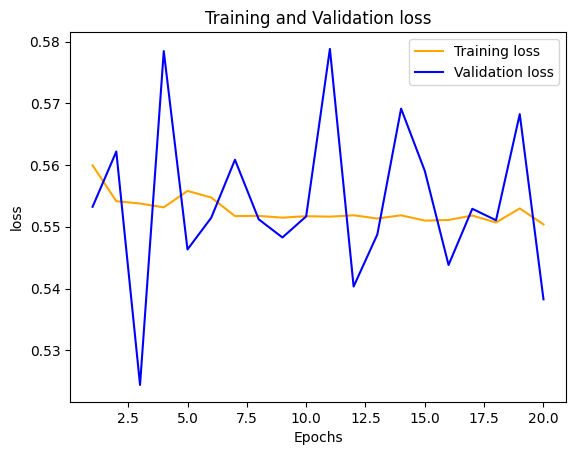

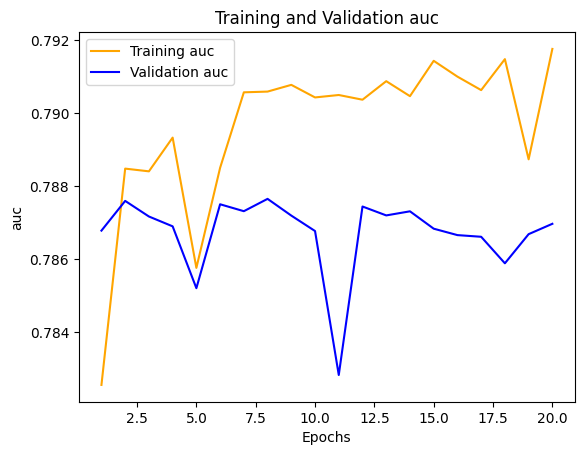

In [139]:
check_metrics(history, 'loss')
check_metrics(history, 'auc')

In [140]:
model.predict(X_transformed_val)

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step


array([[0.33037946],
       [0.42046583],
       [0.61581063],
       ...,
       [0.7747225 ],
       [0.35900503],
       [0.9005897 ]], dtype=float32)

In [141]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_transformed_val)]

637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


In [142]:
print(model.evaluate(X_transformed_train,y_transformed_train.to_numpy(),verbose=0)[1])
print(model.evaluate(X_transformed_val,y_transformed_val.to_numpy(),verbose=0)[1])

0.7931532859802246
0.7869658470153809


Добавление новых и удаление лишних признаков ухудшило модель.

7. Собрав финальный датасет, который состоит из отфильтрованных (или добавленных) новых признаков, добавьте в вашу модель методы регуляризации — BatchNorm, Dropout, EarlyStopping, а также реализуйте автоматическое сохранение наилучших весов по метрике ROC_AUC на лучшей эпохе.



In [206]:
def create_model(X_train):

    model = Sequential()
    model.add(Dense(128, activation='tanh',input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['auc']
                  )
    
    return model

In [207]:
model = create_model(X_train)

early_stopping = EarlyStopping(monitor='val_auc', patience=10)
save_best_weights = ModelCheckpoint(filepath='.weights.h5',
                                    save_weights_only=True,
                                    monitor='val_auc',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train.to_numpy(),
           validation_data=(X_val, y_val.to_numpy()),
           epochs=40,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]},
           callbacks=[early_stopping,save_best_weights])

Epoch 1/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - auc: 0.7448 - loss: 0.6110 - val_auc: 0.7839 - val_loss: 0.5349
Epoch 2/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.7761 - loss: 0.5705 - val_auc: 0.7862 - val_loss: 0.5513
Epoch 3/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.7832 - loss: 0.5609 - val_auc: 0.7872 - val_loss: 0.5472
Epoch 4/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.7876 - loss: 0.5587 - val_auc: 0.7879 - val_loss: 0.5397
Epoch 5/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.7873 - loss: 0.5559 - val_auc: 0.7876 - val_loss: 0.5423
Epoch 6/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.7916 - loss: 0.5504 - val_auc: 0.7870 - val_loss: 0.5579
Epoch 7/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.7926 - loss: 0.5503 - val_auc: 0.7875 - val_loss: 0.5455
Epoch 8/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.7836 - loss: 0.5608 - val_auc: 0.7876 - val_loss: 0.5441
Epoch 9/40
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - au

C:\Users\gavri\AppData\Local\Temp\ipykernel_14876\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


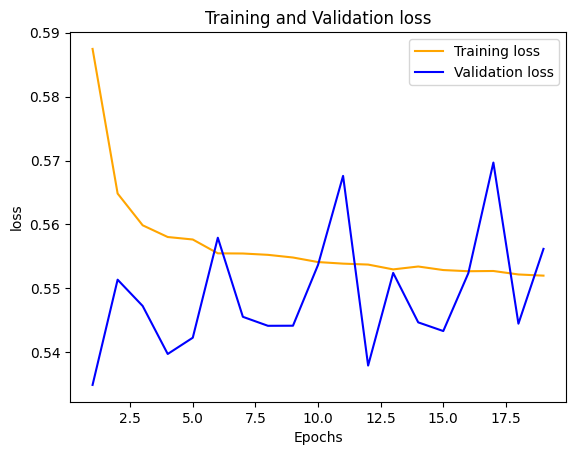

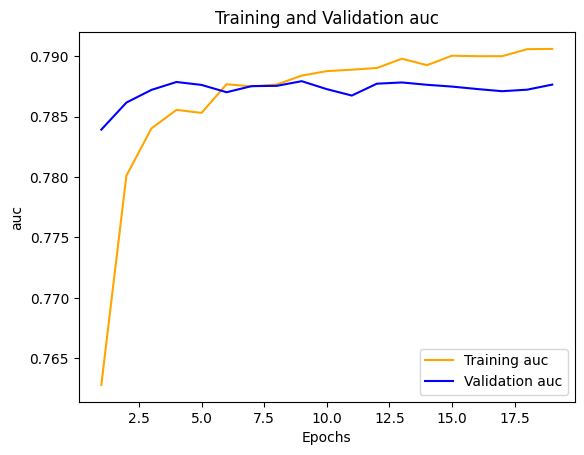

In [208]:
check_metrics(history, 'loss')
check_metrics(history, 'auc')

In [209]:
model.predict(X_val)

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.37222207],
       [0.51550186],
       [0.59379166],
       ...,
       [0.765766  ],
       [0.3516763 ],
       [0.88532287]], dtype=float32)

In [210]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [211]:
print(model.evaluate(X_train,y_train.to_numpy(),verbose=0)[1])
print(model.evaluate(X_val,y_val.to_numpy(),verbose=0)[1])

0.7947274446487427
0.7876660823822021


8. Напишите вывод по всему проекту, он должен содержать в себе:

-  Какие методы регуляризации улучшили качество, а какие плохо повлияли

- Какие признаки повлияли на качество обучения (в лучшую сторону)

- Наилучшую метрику ROC_AUC на валидации



### Вывод:

- BatchNormalization улучшил качество модели, а Dropout наоборот
- функция 'tanh' проявила себя лучше, чем 'relu'
- трансформирование признаков выборки отрицательно сказалось на качестве модели
- лучшая метрика ROC-AUC = 0.7876660823822021
